In [1]:
import pandas as pd
import numpy as np
import arimafd as oa
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

In [2]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
df = pd.read_csv("C:/Users/jun99/OneDrive - 계명대학교/바탕 화면/Project/TP/분석 연습/data/heart_rate.csv")
df.head()

,pkg_name,heart_beat_count,time_offset,binning_data,max,heart_rate,comment,start_time,deviceuuid,custom,end_time,datauuid,create_time,update_time,min
0,com.sec.android.app.shealth,1,32400000,921ae363-8895-16a1-0251-e75599afcfe6.binning_data,115,109,NaN,2023. 07. 24. 18:00:00,AIAJJofc8K,NaN,2023. 07. 24. 18:59:02,921ae363-8895-16a1-0251-e75599afcfe6,2023. 07. 24. 18:59:02,2023. 07. 24. 18:59:02,71
1,com.sec.android.app.shealth,1,32400000,48b6ccc4-ba62-0b99-4054-6126431f4230.binning_data,118,102,NaN,2023. 07. 24. 19:00:00,AIAJJofc8K,NaN,2023. 07. 24. 19:59:01,48b6ccc4-ba62-0b99-4054-6126431f4230,2023. 07. 24. 19:59:01,2023. 07. 24. 19:59:01,70
2,com.sec.android.app.shealth,1,32400000,915a1260-8a88-cc83-117d-036f111d2576.binning_data,125,123,NaN,2023. 07. 24. 20:00:00,AIAJJofc8K,NaN,2023. 07. 24. 20:59:00,915a1260-8a88-cc83-117d-036f111d2576,2023. 07. 24. 20:59:00,2023. 07. 24. 20:59:00,83
3,com.sec.android.app.shealth,1,32400000,cd353d52-bd72-566a-d07e-a49fe9eef546.binning_data,150,85,NaN,2023. 07. 24. 21:00:00,AIAJJofc8K,NaN,2023. 07. 24. 21:59:01,cd353d52-bd72-566a-d07e-a49fe9eef546,2023. 07. 24. 21:59:01,2023. 07. 24. 21:59:01,82
4,com.sec.android.app.shealth,1,32400000,4ccf68b7-86fd-32c7-c656-8248105b1a30.binning_data,117,78,NaN,2023. 07. 24. 22:00:00,AIAJJofc8K,NaN,2023. 07. 24. 22:59:00,4ccf68b7-86fd-32c7-c656-8248105b1a30,2023. 07. 24. 22:59:00,2023. 07. 24. 22:59:00,68


In [4]:
df[['heart_rate','start_time','end_time','create_time','update_time']].head()

,heart_rate,start_time,end_time,create_time,update_time
0,109,2023. 07. 24. 18:00:00,2023. 07. 24. 18:59:02,2023. 07. 24. 18:59:02,2023. 07. 24. 18:59:02
1,102,2023. 07. 24. 19:00:00,2023. 07. 24. 19:59:01,2023. 07. 24. 19:59:01,2023. 07. 24. 19:59:01
2,123,2023. 07. 24. 20:00:00,2023. 07. 24. 20:59:00,2023. 07. 24. 20:59:00,2023. 07. 24. 20:59:00
3,85,2023. 07. 24. 21:00:00,2023. 07. 24. 21:59:01,2023. 07. 24. 21:59:01,2023. 07. 24. 21:59:01
4,78,2023. 07. 24. 22:00:00,2023. 07. 24. 22:59:00,2023. 07. 24. 22:59:00,2023. 07. 24. 22:59:00


In [5]:
df['update_time'] = pd.to_datetime(df['update_time'], errors='coerce')

In [6]:
df['update_time'].dt.strftime('%y-%m-%d %H')

0       23-07-24 18
1       23-07-24 19
2       23-07-24 20
3       23-07-24 21
4       23-07-24 22
           ...     
2385    23-09-17 17
2386    23-09-17 18
2387    23-09-17 19
2388    23-09-17 20
2389    23-09-17 21
Name: update_time, Length: 2390, dtype: object

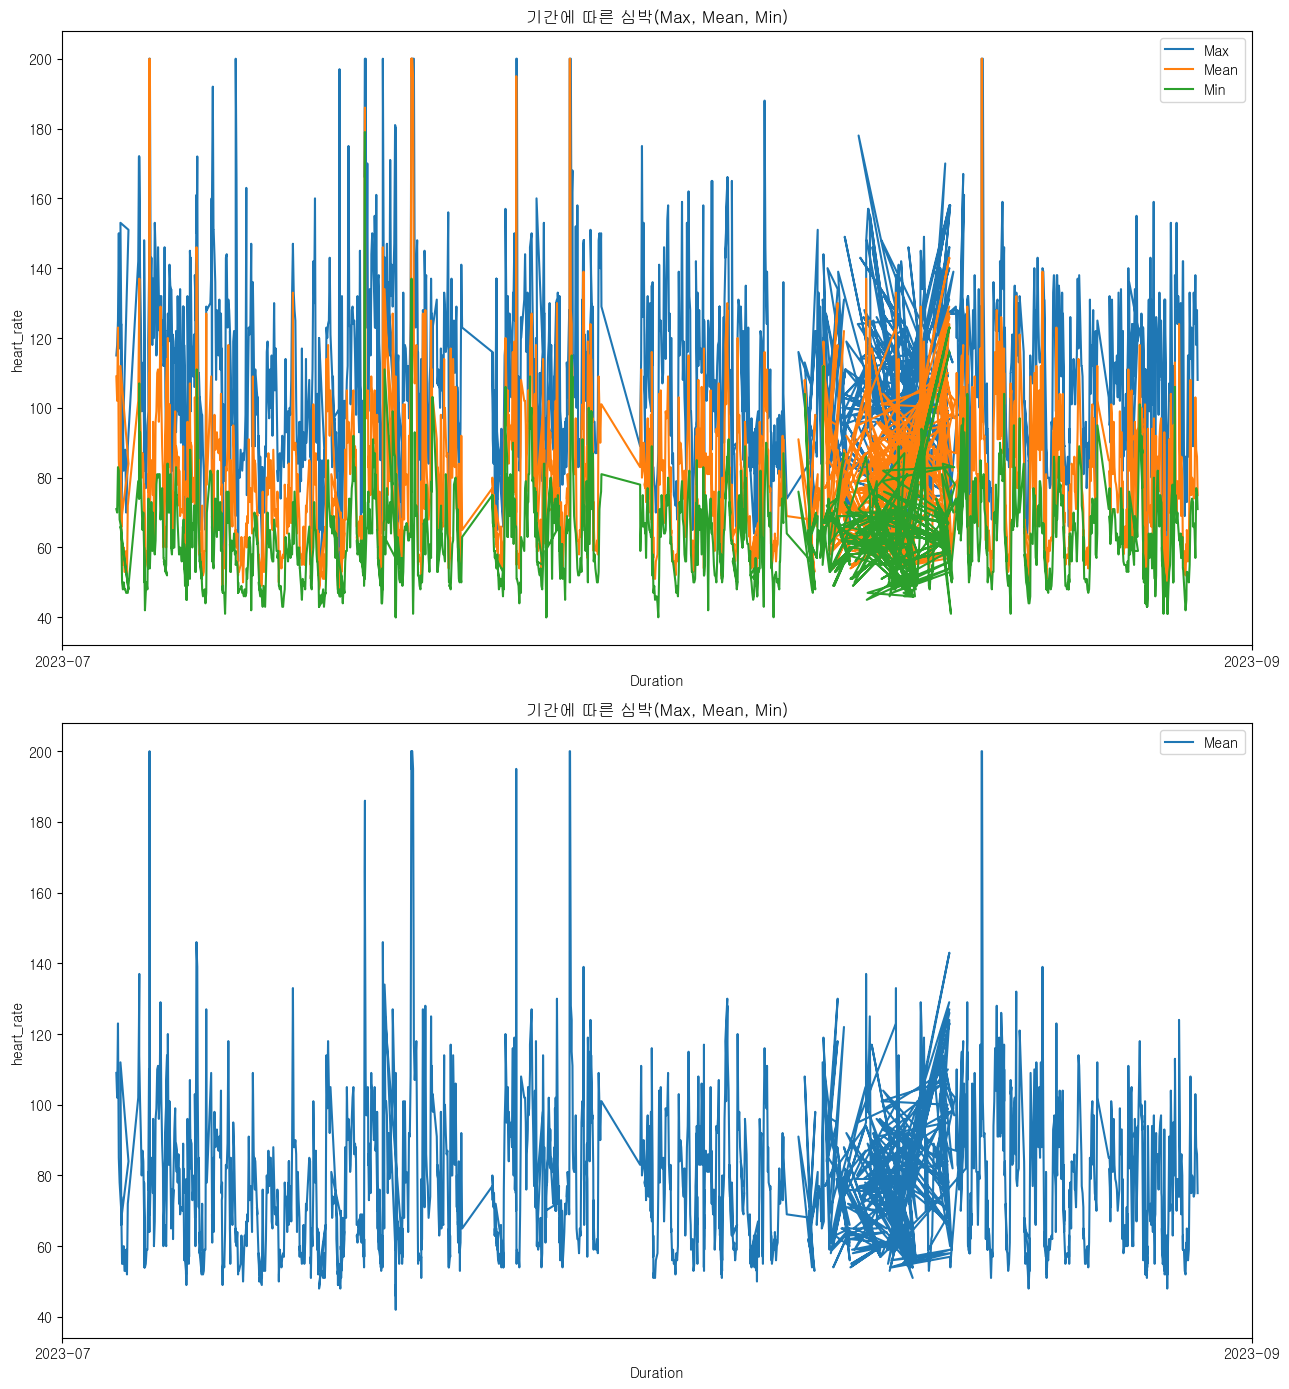

In [7]:
# Assuming df and other necessary data are defined

plt.figure(figsize=(13, 14))

# First subplot
ax1 = plt.subplot(2, 1, 1)
plt.title('기간에 따른 심박(Max, Mean, Min)')
plt.plot(df.update_time, df['max'], label='Max')
plt.plot(df.update_time, df['heart_rate'], label='Mean')
plt.plot(df.update_time, df['min'], label='Min')
plt.xlabel('Duration')
plt.ylabel('heart_rate')
plt.legend()
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Second subplot
ax2 = plt.subplot(2, 1, 2)
plt.title('기간에 따른 심박(Max, Mean, Min)')
plt.plot(df.update_time, df['heart_rate'], label='Mean')
plt.xlabel('Duration')
plt.ylabel('heart_rate')
plt.legend()
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=5))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.tight_layout()
plt.show()

In [8]:
df_heart = df[['update_time','heart_rate']]
df_heart.set_index('update_time', inplace=True)
df_heart

,heart_rate
update_time,
2023-07-24 18:59:02,109
2023-07-24 19:59:01,102
2023-07-24 20:59:00,123
2023-07-24 21:59:01,85
2023-07-24 22:59:00,78
...,...
2023-09-17 17:59:26,75
2023-09-17 18:59:25,103
2023-09-17 19:59:24,88


#### ar_order 어떻게 정하는지 찾아보기

In [9]:
additional_values = [1000] * 10  # noise 생성
df_additional = pd.DataFrame({'heart_rate': additional_values})  # 추가할 데이터프레임 생성

df_heart = pd.concat([df_heart, df_additional], ignore_index=True)

print(df_heart.shape)
print(df_heart[2385:])

# 섞기
df_heart[1673:] = df_heart[1673:].sample(frac=1)
print(df_heart[2385:])

(2400, 1)
      heart_rate
2385          75
2386         103
2387          88
2388          86
2389          75
2390        1000
2391        1000
2392        1000
2393        1000
2394        1000
2395        1000
2396        1000
2397        1000
2398        1000
2399        1000
      heart_rate
2385          57
2386          51
2387          54
2388          92
2389          86
2390          58
2391          94
2392          97
2393         200
2394          92
2395          66
2396          65
2397          65
2398          54
2399          72


#### ar order 정하기

In [106]:
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(df_heart[:960], order= (1,0,1))
model_fit = model.fit()

model2 = ARIMA(df_heart[:960], order= (2,0,1))
model2_fit = model2.fit()

model3 = ARIMA(df_heart[:960], order= (1,0,2))
model3_fit = model3.fit()

model4 = ARIMA(df_heart[:960], order= (2,0,2))
model4_fit = model4.fit()

model5 = ARIMA(df_heart[:960], order= (3,0,0))
model5_fit = model5.fit()

In [107]:
model3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             heart_rate   No. Observations:                  960
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -4042.409
Date:                Fri, 15 Sep 2023   AIC                           8094.818
Time:                        15:37:37   BIC                           8119.152
Sample:                             0   HQIC                          8104.085
                                - 960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.2313      3.608     20.852      0.000      68.160      82.303
ar.L1          0.8471      0.023     37.595      0.000       0.803       0.891
ma.L1         -0.2614      0.029     -8.878      0.000      -0.319      -0.204
ma.L2         -0.0254      0.025     -1.032      0.302      -0.074       0.023
sigma2       265.8277      5.954     44.650      0.000     254.159     277.496
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10695.31
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                             2.26
Prob(H) (two-sided):                  0.53   Kurtosis:                        18.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
my_arima = oa.Arima_anomaly_detection(ar_order=3)
my_arima.fit(df_heart[:1673], window=167, window_insensitivity=60)
ts_anomaly = my_arima.predict(df_heart[1674:], window= 60, window_insensitivity=10)

print(df_heart[df_heart['heart_rate']==1000].index)
ts_anomaly[ts_anomaly==1].index

Time seconds: 1.0881779193878174
Int64Index([1711, 1880, 1912, 1926, 1957, 2028, 2042, 2245, 2344, 2372], dtype='int64')


Int64Index([], dtype='int64')

In [11]:
print('ar order=1')

#####
# fit(window = 5,10, 30,50, window_in~ = 5,10,30,50), predict = default
print(df_heart.iloc[[1912,2361,2366]]) #60초반 값들만 감지함 뭐지

# fit(window = 5,10, 30,50, window_in~ = 5,10,30,50), predict = default
print(df_heart.iloc[[1942,2145,2359,2384]]) #59~70 음

# fit(window =  30, window_in~ = 60), predict(window=10), 1000은 다 감지했음
print(df_heart.iloc[[1702, 1911, 1935, 1957, 2036, 2097, 2108, 2154, 2260, 2365]])

# fit(window =  30, window_in~ = 60), predict(window=10, window_in~ = 60)
print(df_heart.iloc[[2212]]) # 65
###########

print('ar order=3')
# fit(window =  30, window_in~ = 60), predict(window=10)
print(df_heart.iloc[[1715,2378]]) # 처음으로 100잡음

# fit(window =  30, window_in~ = 60), predict(window=5, window_insensitivity=30)
print(df_heart.iloc[[1693, 1893, 1953, 2113, 2159, 2212, 2360]]) 

# fit(window =  30, window_in~ = 60), predict(window=5, window_insensitivity=10)
print(df_heart.iloc[[1693, 1715, 1893, 1911, 1953, 2113, 2159, 2212, 2360, 2374]]) 

# fit(window =  30, window_in~ = 60), predict(window=5, window_insensitivity=10)
print(df_heart.iloc[[1691, 1716, 1749, 1795, 1885, 1906, 1917, 2275, 2319]]) 

ar order=1
      heart_rate
1912        1000
2361          76
2366          60
      heart_rate
1942          62
2145          59
2359          67
2384          88
      heart_rate
1702         103
1911          64
1935          82
1957        1000
2036         106
2097          68
2108          83
2154          63
2260          75
2365          64
      heart_rate
2212          76
ar order=3
      heart_rate
1715          86
2378          54
      heart_rate
1693          76
1893         200
1953          60
2113          73
2159          68
2212          76
2360         111
      heart_rate
1693          76
1715          86
1893         200
1911          64
1953          60
2113          73
2159          68
2212          76
2360         111
2374          75
      heart_rate
1691          97
1716          65
1749          80
1795          85
1885          69
1906          63
1917          56
2275          63
2319          71


In [13]:
help(oa.Arima_anomaly_detection)

Help on class Arima_anomaly_detection in module arimafd.main:

class Arima_anomaly_detection(arimafd.tanh.Anomaly_detection)
 |  Arima_anomaly_detection(ar_order=None)
 |  
 |  Thic class for anomaly detection application of modernized ARIMA model
 |  
 |  Examples
 |  --------
 |  >>> import pandas as pd
 |  >>> import numpy as np
 |  >>> import arimafd as oa
 |  >>> my_array = np.random.normal(size=1000) # init array
 |  >>> my_array[-3] = 1000 # init anomaly
 |  >>> ts = pd.DataFrame(my_array,
 |  >>>                   index=pd.date_range(start='01-01-2000',
 |  >>>                                       periods=1000,
 |  >>>                                       freq='H'))
 |  >>> my_arima = oa.Arima_anomaly_detection(ar_order=3)
 |  >>> my_arima.fit(ts[:500])
 |  >>> my_arima.predict(ts[500:])
 |  
 |  Method resolution order:
 |      Arima_anomaly_detection
 |      arimafd.tanh.Anomaly_detection
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, ar_orde

In [84]:
ad = oa.Anomaly_detection(df_heart[:1673],) #init anomaly detection algorithm
ad.generate_tensor(ar_order=1) #it compute weights of ARIMA on history 
ts_anomaly = ad.proc_tensor() #processing of weights. 
# ad.ebeluate_nab() # function for evaluating results of algorithms
ts_anomaly[ts_anomaly==1]

Projection
Projection
Time seconds: 0.9923133850097656


534    1.0
dtype: float64

In [86]:
help(oa.Anomaly_detection)

Help on class Anomaly_detection in module arimafd.tanh:

class Anomaly_detection(builtins.object)
 |  Anomaly_detection(data)
 |  
 |  This class for anomaly detection application of modernized ARIMA model
 |  
 |  Examples:
 |  ----------
 |  
 |  >>> import pandas as pd
 |  >>> import numpy as np
 |  >>> import arimafd as oa
 |  >>> my_array = np.random.normal(size=1000) # init array
 |  >>> my_array[-3] = 1000 # init anomaly
 |  >>> ts = pd.DataFrame(my_array,
 |  >>>                   index=pd.date_range(start='01-01-2000',
 |  >>>                                       periods=1000,
 |  >>>                                       freq='H'))
 |  >>> ad = oa.anomaly_detection(ts) #init anomaly detection algorithm
 |  >>> ad.generate_tensor(ar_order=3) #it compute weights of ARIMA on history 
 |  >>> ts_anomaly = ad.proc_tensor() #processing of weights. 
 |  >>> ts_anomaly
 |  
 |  Methods defined here:
 |  
 |  __init__(self, data)
 |      Parameters
 |      ----------
 |      data: pa